In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

### EDA

### 1.1 Read data train.csv

In [2]:
df = pd.read_csv("./input_data/ford/train.csv")

In [3]:
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  \
0     Fiesta  2017   8498       Manual    28637   Diesel    0  78.5   
1     Fiesta  2013   5490       Manual    45740   Petrol   30  54.3   
2     Fiesta  2018  13181    Semi-Auto    10414   Petrol  145  48.7   
3      B-MAX  2014   7998       Manual     9181   Petrol   30  55.4   
4   EcoSport  2016   7890       Manual    30035   Diesel   30  64.2   

   engineSize  
0         1.5  
1         1.2  
2         1.0  
3         1.0  
4         1.5

In [4]:
df.shape

(14370, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14370 entries, 0 to 14369
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         14370 non-null  object 
 1   year          14370 non-null  int64  
 2   price         14370 non-null  int64  
 3   transmission  14370 non-null  object 
 4   mileage       14370 non-null  int64  
 5   fuelType      14370 non-null  object 
 6   tax           14370 non-null  int64  
 7   mpg           14370 non-null  float64
 8   engineSize    14370 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1010.5+ KB


In [6]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
# Các cột không có dữ liệu null
# Các cột đúng kiểu dữ liệu

In [8]:
df.describe()

year         price        mileage           tax           mpg  \
count  14370.000000  14370.000000   14370.000000  14370.000000  14370.000000   
mean    2016.869311  12270.363814   23333.277801    113.133403     57.929910   
std        2.056454   4747.275442   19427.195845     62.388703     10.176018   
min     1996.000000    675.000000       1.000000      0.000000     20.800000   
25%     2016.000000   8999.000000    9995.250000     30.000000     52.300000   
50%     2017.000000  11250.000000   18216.500000    145.000000     58.900000   
75%     2018.000000  15299.000000   31000.750000    145.000000     65.700000   
max     2060.000000  54995.000000  174000.000000    580.000000    201.800000   

         engineSize  
count  14370.000000  
mean       1.350292  
std        0.434927  
min        0.000000  
25%        1.000000  
50%        1.200000  
75%        1.500000  
max        5.000000

In [9]:
df.describe(include='O')

model transmission fuelType
count     14370        14370    14370
unique       24            3        5
top      Fiesta       Manual   Petrol
freq       5233        12403     9746

In [10]:
# Loại bỏ khảong trắng cột model
df['model'] = df['model'].str.strip()

In [11]:
df_cat = df.select_dtypes('object')
cols_cat = df_cat.columns
cols_cat

Index(['model', 'transmission', 'fuelType'], dtype='object')

In [12]:
cols_cont = list(set(df.columns) - set(cols_cat))
cols_cont

['mpg', 'mileage', 'year', 'engineSize', 'price', 'tax']

### 1.2 Data Visualization

#### 1.2.1 Single variable

#### 1.2.1.2 Category variable

In [13]:
from analysis.analyzer import TTTH_Analyzer
_analyzer = TTTH_Analyzer()

**************************************************
Phân tích biến model
Class count of model:

Fiesta                   5233
Focus                    3648
Kuga                     1752
EcoSport                  932
C-MAX                     454
Ka+                       435
Mondeo                    422
B-MAX                     286
S-MAX                     238
Grand C-MAX               202
Galaxy                    173
KA                        165
Edge                      164
Puma                       68
Tourneo Custom             56
Mustang                    49
Grand Tourneo Connect      46
Tourneo Connect            27
Fusion                     15
Streetka                    2
Escort                      1
Transit Tourneo             1
Ranger                      1
Name: model, dtype: int64


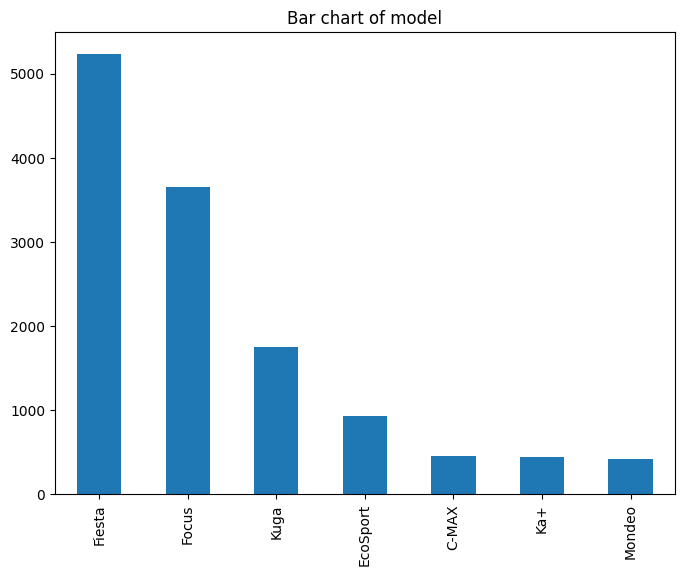

**************************************************
Phân tích biến transmission
Class count of transmission:

Manual       12403
Automatic     1078
Semi-Auto      889
Name: transmission, dtype: int64


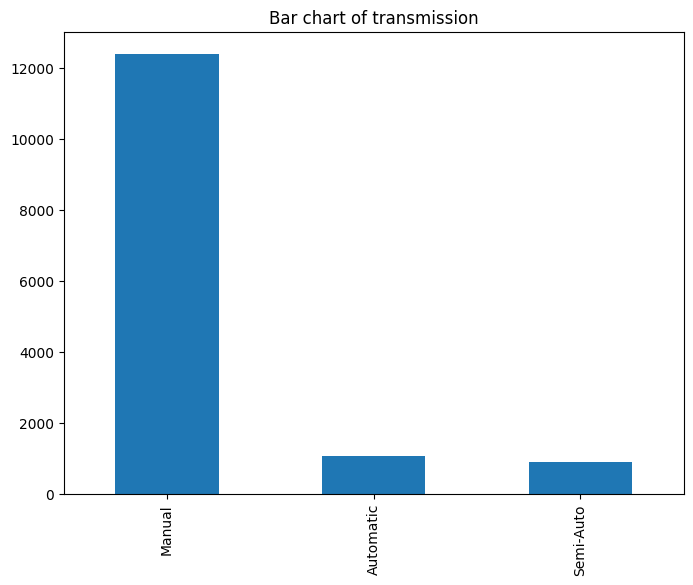

**************************************************
Phân tích biến fuelType
Class count of fuelType:

Petrol      9746
Diesel      4601
Hybrid        21
Electric       1
Other          1
Name: fuelType, dtype: int64


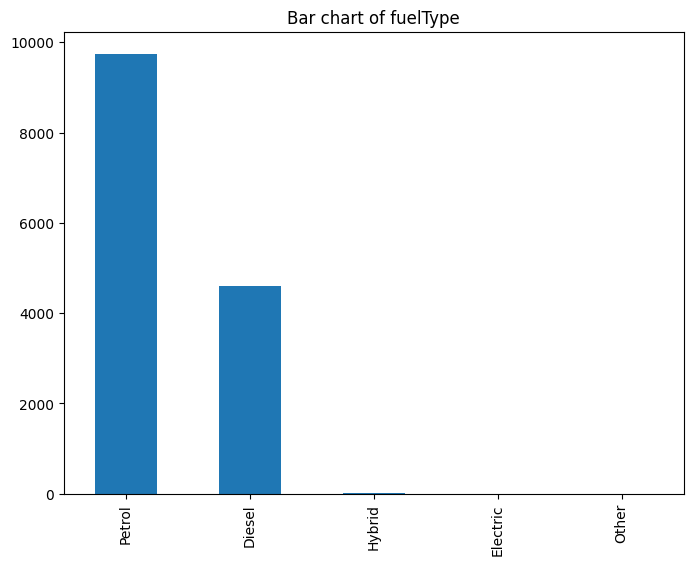

In [14]:
for col in cols_cat:
    print('*' * 50)
    print('Phân tích biến', col)
    _analyzer.analyze_category_variable(variable_name=col, df=df)

In [15]:
# Nhận xét: Các biến phân bố không chuẩn

#### 1.2.1.2 Continuous variable

**************************************************
Phân tích biến price
Class count of price:

10000    139
11000    127
10500    112
9000      96
11500     94
        ... 
15289      1
24495      1
13379      1
24989      1
11746      1
Name: price, Length: 3124, dtype: int64


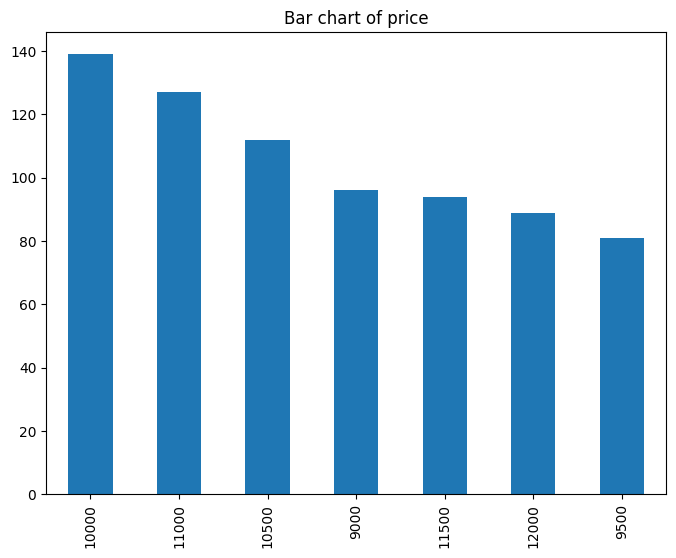

**************************************************
Phân tích biến engineSize
Class count of engineSize:

1.0    6218
1.5    2748
2.0    2618
1.2    1313
1.6     738
1.1     442
1.4      98
2.3      59
5.0      40
0.0      38
1.8      27
2.2      10
2.5      10
1.3       9
3.2       1
1.7       1
Name: engineSize, dtype: int64


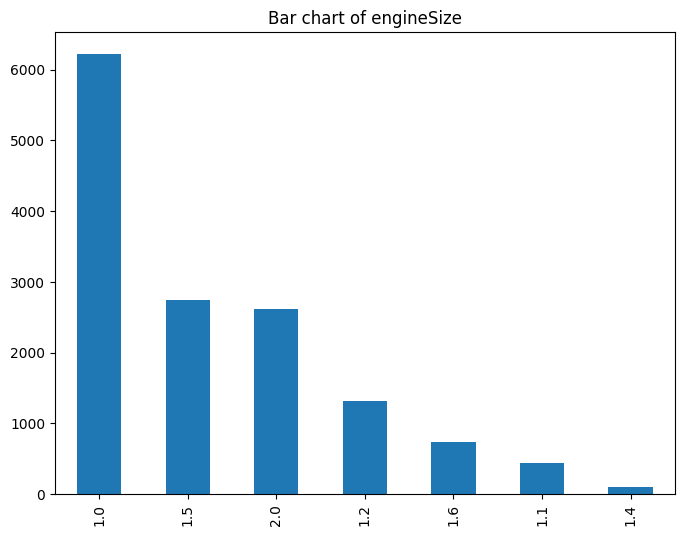

**************************************************
Phân tích biến mileage
Class count of mileage:

10       32
15000    31
10000    27
25000    26
12000    25
         ..
16276     1
9156      1
35183     1
12005     1
26495     1
Name: mileage, Length: 11244, dtype: int64


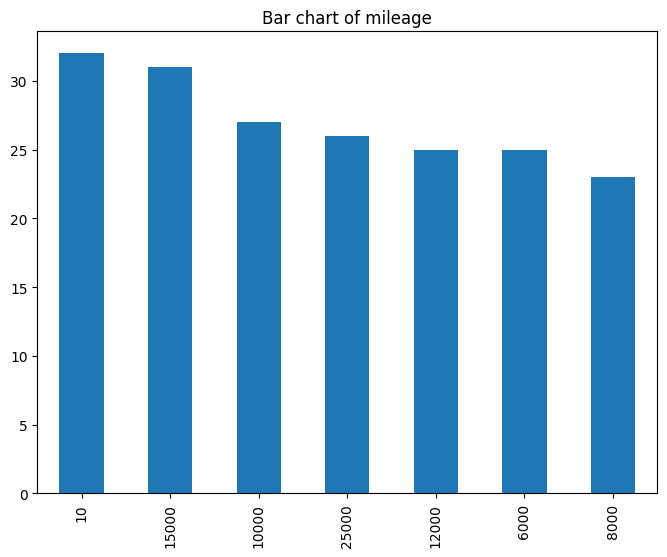

**************************************************
Phân tích biến mpg
Class count of mpg:

65.7    2026
54.3    1416
60.1    1324
64.2     806
57.7     763
        ... 
24.8       1
28.5       1
34.0       1
54.2       1
36.2       1
Name: mpg, Length: 87, dtype: int64


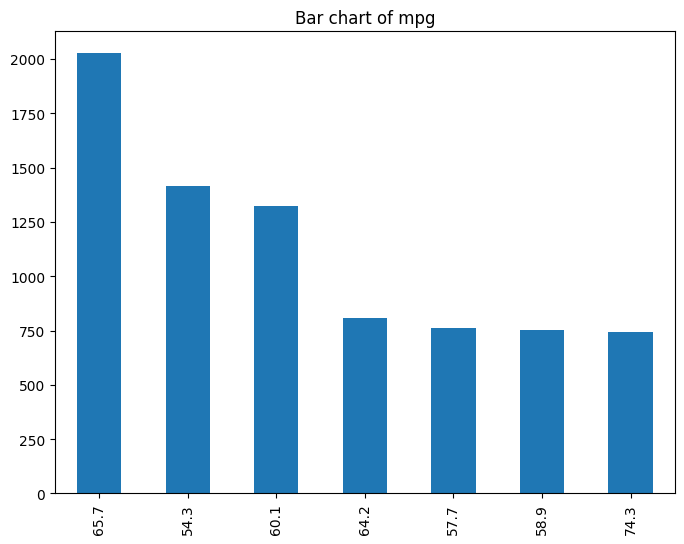

**************************************************
Phân tích biến tax
Class count of tax:

145    7130
0      1724
150    1557
125    1103
30     1012
20      980
160     281
200     201
235      99
165      94
205      48
260      36
240      28
265      14
135       9
140       7
300       7
570       6
325       5
195       5
555       3
230       2
115       2
120       2
305       2
155       2
580       2
220       2
290       1
210       1
22        1
185       1
190       1
270       1
330       1
Name: tax, dtype: int64


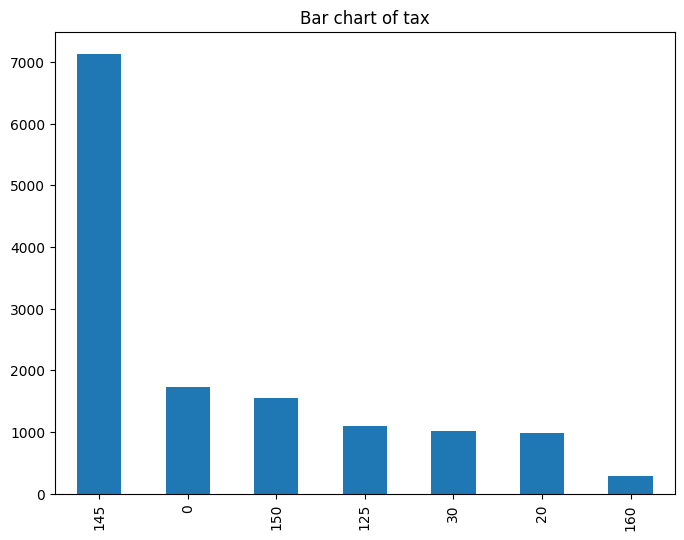

**************************************************
Phân tích biến year
Class count of year:

2017    3910
2018    3226
2019    2548
2016    1870
2015    1062
2014     637
2013     501
2020     212
2012      98
2009      80
2011      75
2010      53
2008      40
2007      21
2005      15
2006      12
2004       3
2003       2
2002       2
1996       1
1998       1
2060       1
Name: year, dtype: int64


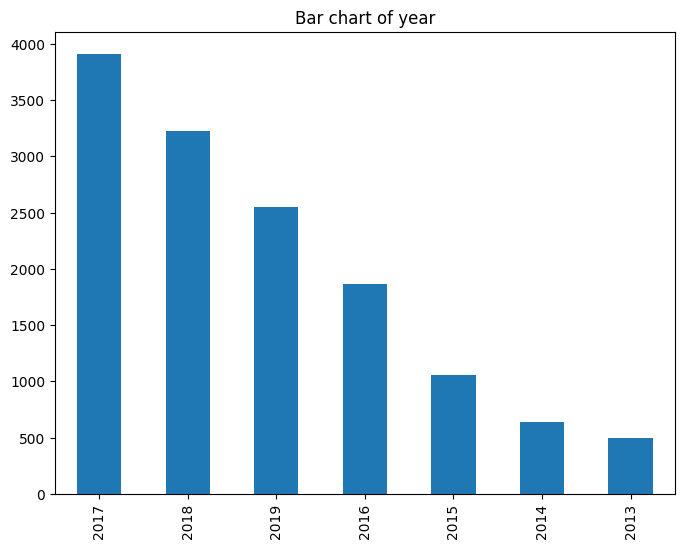

In [16]:
for col in cols_cont:
    print('*' * 50)
    print('Phân tích biến', col)
    _analyzer.analyze_category_variable(variable_name=col, df=df)

Nhận xét:
* Tất cả biến liên tục đều có phân phối không chuẩn
* Có nhiều outliers
* Thang đo giữa các biến chênh lệch lớn

### 1.2.2 Multiple variables

#### 1.2.2.1 Category variables với Output

__________________________________________________
phân tích 2 biến cat-cont:  model  và  price
                sum_sq       df           F  PR(>F)
C(model)  1.375339e+11     22.0  481.445654     0.0
Residual  1.862949e+11  14347.0         NaN     NaN


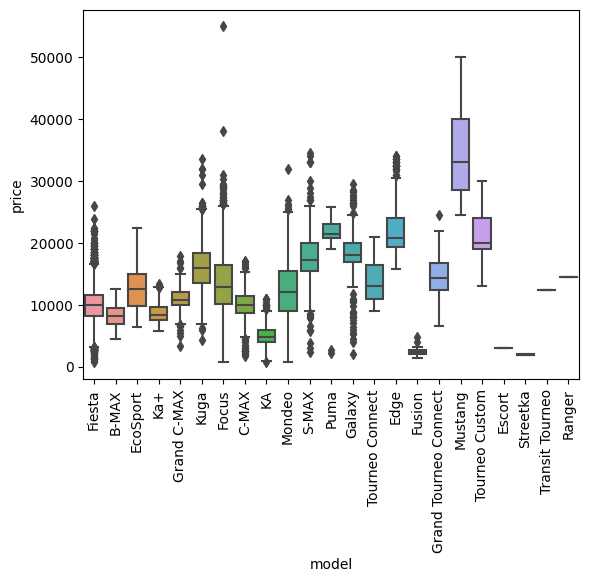

__________________________________________________
phân tích 2 biến cat-cont:  transmission  và  price
                       sum_sq       df           F         PR(>F)
C(transmission)  2.152461e+10      2.0  511.478473  2.626772e-215
Residual         3.023041e+11  14367.0         NaN            NaN


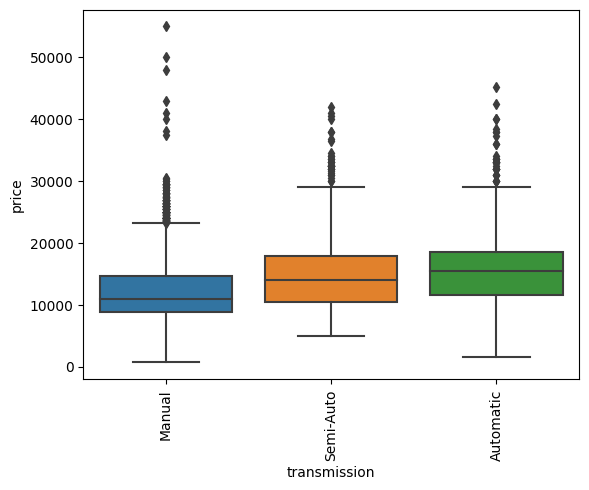

__________________________________________________
phân tích 2 biến cat-cont:  fuelType  và  price
                   sum_sq       df           F         PR(>F)
C(fuelType)  1.491215e+10      4.0  173.358321  2.918538e-145
Residual     3.089166e+11  14365.0         NaN            NaN


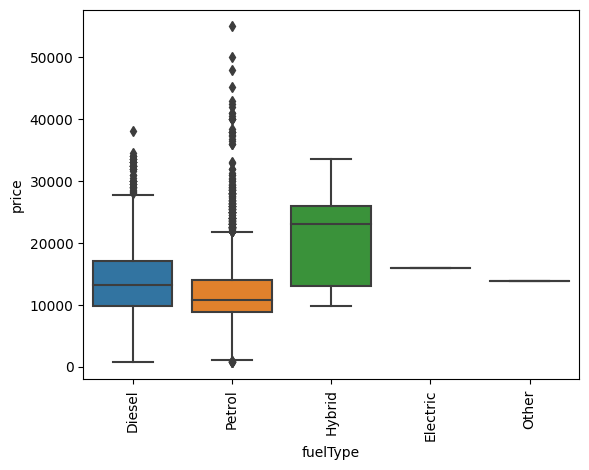

In [17]:
col2 = 'price'
for i in range(0,len (cols_cat)):
    col1 = cols_cat[i]
    print('_'*50)
    print('phân tích 2 biến cat-cont: ', col1, ' và ', col2)
    _analyzer.analyze_continous_vs_categories (continous_var=col2, category_vars=col1, df=df)

In [18]:
# Các biến category có ảnh hưởng tới price

#### 1.2.2.2 Continuous variable với Output

__________________________________________________
__________________________________________________
phân tích biến  engineSize  và output price
bảng phương sai:              engineSize     price
engineSize    1.000000  0.414711
price         0.414711  1.000000


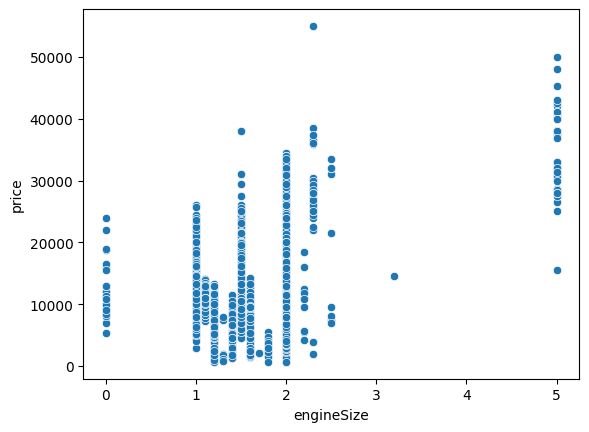

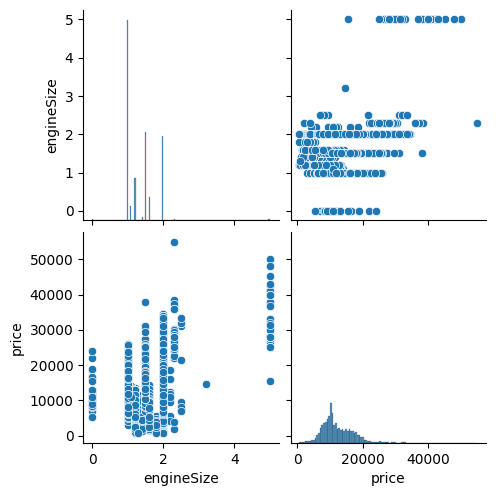

__________________________________________________
phân tích biến  mileage  và output price
bảng phương sai:            mileage     price
mileage  1.000000 -0.530423
price   -0.530423  1.000000


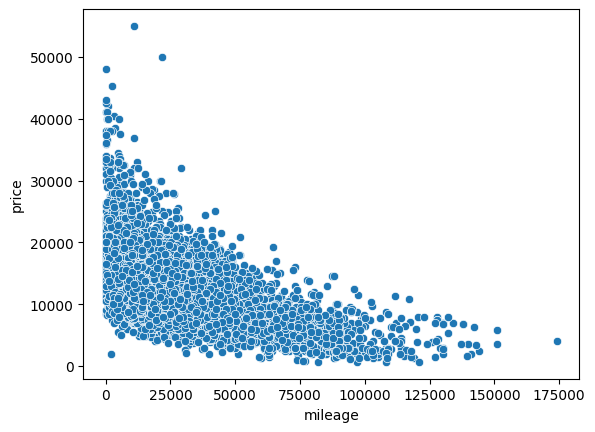

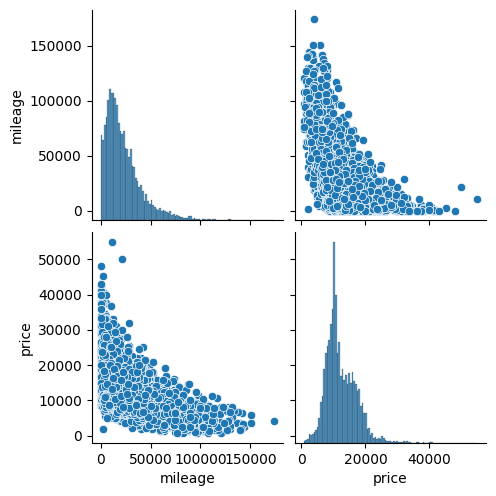

__________________________________________________
phân tích biến  mpg  và output price
bảng phương sai:              mpg     price
mpg    1.000000 -0.348553
price -0.348553  1.000000


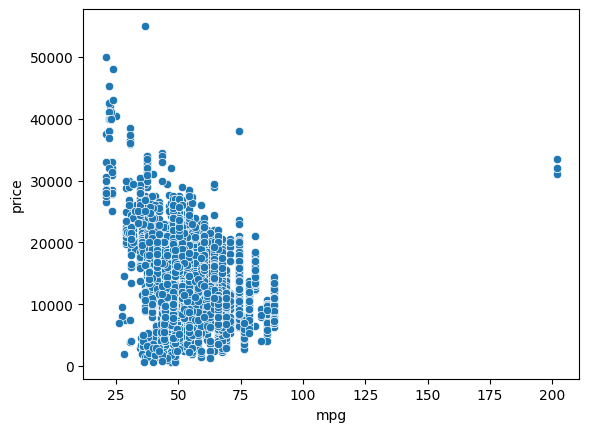

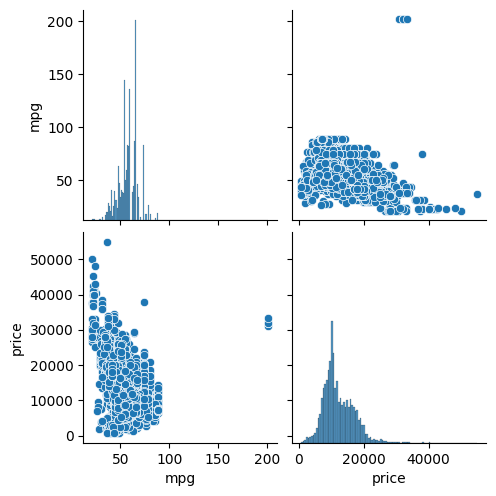

__________________________________________________
phân tích biến  tax  và output price
bảng phương sai:              tax     price
tax    1.000000  0.409687
price  0.409687  1.000000


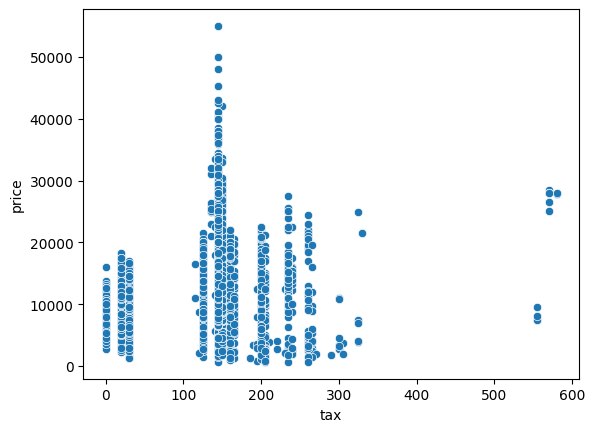

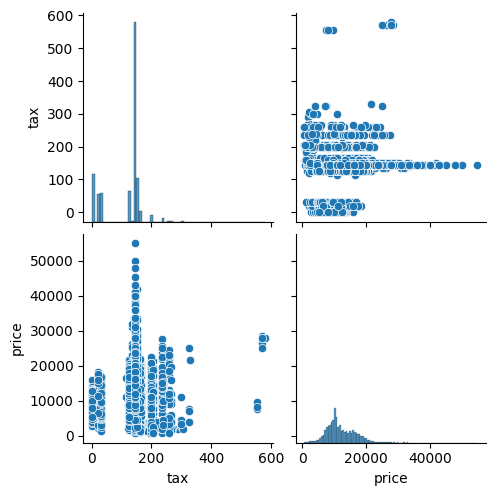

__________________________________________________
phân tích biến  year  và output price
bảng phương sai:             year     price
year   1.000000  0.634671
price  0.634671  1.000000


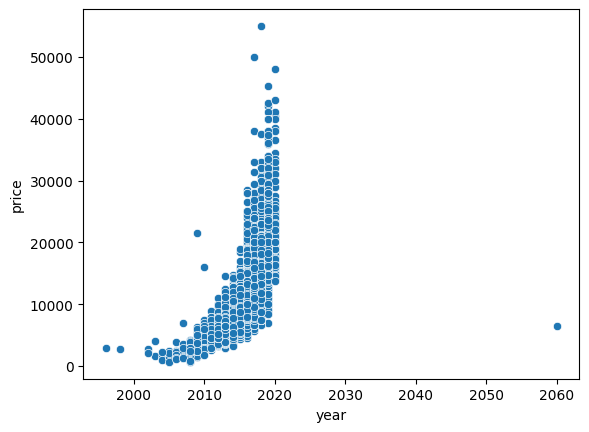

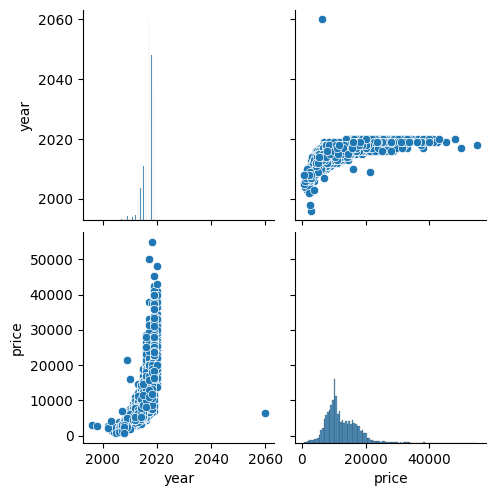

In [19]:
co12 = 'price'
for i in range(0,len (cols_cont)): 
    col1 = cols_cont[i] 
    print('_'*50)
    if col1 != col2:
        print('phân tích biến ', col1, ' và output', col2) 
        df = df.dropna (axis=0, subset=[col1, col2]) 
        print('bảng phương sai: ', df[[col1, col2]].corr()) 
        sns.scatterplot(data=df, x=col1, y=col2)
        plt.show()
        sns.pairplot (df[[col1, col2]]) 
        plt.show()

In [20]:
# các biến continuous có ảnh hưởng tới price


#### 1.2.2.3 Continuous variables vs Continuous variables

In [21]:
df[cols_cont].corr()

price  engineSize   mileage       mpg       tax      year
price       1.000000    0.414711 -0.530423 -0.348553  0.409687  0.634671
engineSize  0.414711    1.000000  0.210307 -0.260038  0.186671 -0.132079
mileage    -0.530423    0.210307  1.000000  0.123335 -0.263182 -0.701774
mpg        -0.348553   -0.260038  0.123335  1.000000 -0.503602 -0.025817
tax         0.409687    0.186671 -0.263182 -0.503602  1.000000  0.301014
year        0.634671   -0.132079 -0.701774 -0.025817  0.301014  1.000000

In [22]:
# các biến số đều có tương quan với 'price' (abs(corr) > 8.3), nhưng mức độ tươn 
# các biến input có tương quan với nhau nhưng mức độ tương quan không mạnh (trừ t 
# số lượng biến ít nên cân nhắc giữ lại hết

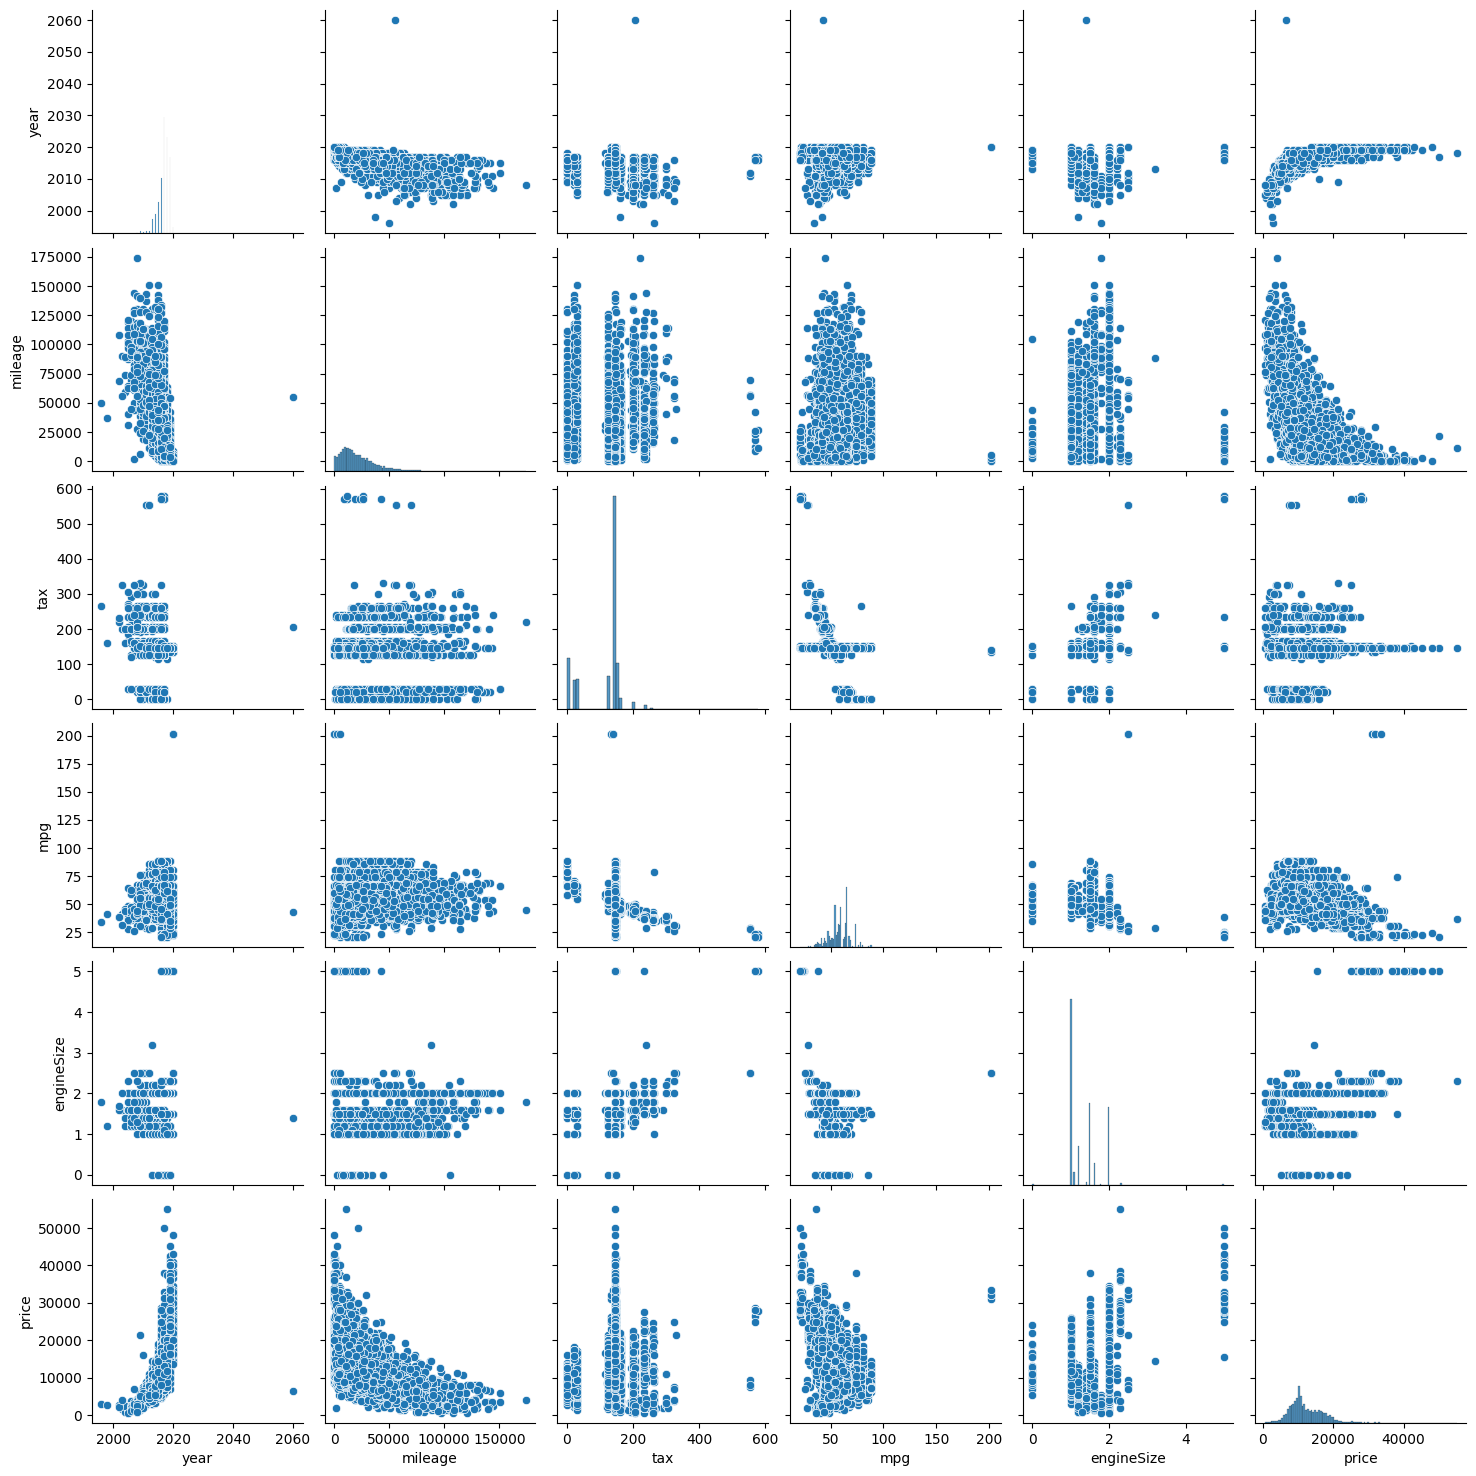

In [23]:
sns.pairplot(df [[ 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']]) 
plt.show()

### 2. Preprocessing & Build model

#### 2.1 Preprocessing

In [24]:
df.model.value_counts()

Fiesta                   5233
Focus                    3648
Kuga                     1752
EcoSport                  932
C-MAX                     454
Ka+                       435
Mondeo                    422
B-MAX                     286
S-MAX                     238
Grand C-MAX               202
Galaxy                    173
KA                        165
Edge                      164
Puma                       68
Tourneo Custom             56
Mustang                    49
Grand Tourneo Connect      46
Tourneo Connect            27
Fusion                     15
Streetka                    2
Escort                      1
Transit Tourneo             1
Ranger                      1
Name: model, dtype: int64

In [25]:
# cập nhật lại cột 'model': 13 giá trị xuất hiện nhiều nhất thì giữ nguyên, các

In [26]:
df['model'] = df['model'].map(lambda x: x if x in (df.model.value_counts()[:13].index.tolist()) else 'Other')

In [27]:
df.model.value_counts()

Fiesta         5233
Focus          3648
Kuga           1752
EcoSport        932
C-MAX           454
Ka+             435
Mondeo          422
B-MAX           286
Other           266
S-MAX           238
Grand C-MAX     202
Galaxy          173
KA              165
Edge            164
Name: model, dtype: int64

In [28]:
df.fuelType.value_counts()

Petrol      9746
Diesel      4601
Hybrid        21
Electric       1
Other          1
Name: fuelType, dtype: int64

In [29]:
# cập nhật Lại cột 'fueltype': 2 giá trị xuất hiện nhiều nhất thì giữ nguyên

In [30]:
df['fuelType'] = df['fuelType'].map(lambda x:x if x in (df.fuelType.value_counts()[:2].index.tolist()) else 'other')

In [31]:
df.fuelType.value_counts()

Petrol    9746
Diesel    4601
other       23
Name: fuelType, dtype: int64

In [32]:
# cột "transmission' là biến phân loại có thứ tự:
# tiến hành đổi giá trị sang dạng số: 'Manual' = Đ; 'Semi-Auto' = 1; 'Automati

In [33]:
df['transmission'] = df['transmission'].map(lambda x: 0 if x == 'Manual' else (1 if x == 'Semi-Auto' else 2))

In [34]:
# các biến 'model', 'fueltype' là các biến phân Loại không có thứ tự 
df_now= pd.get_dummies (data = df,columns=['model', 'fuelType'], drop_first=True)
df_now.head()

year  price  transmission  mileage  tax   mpg  engineSize  model_C-MAX  \
0  2017   8498             0    28637    0  78.5         1.5            0   
1  2013   5490             0    45740   30  54.3         1.2            0   
2  2018  13181             1    10414  145  48.7         1.0            0   
3  2014   7998             0     9181   30  55.4         1.0            0   
4  2016   7890             0    30035   30  64.2         1.5            0   

   model_EcoSport  model_Edge  ...  model_Galaxy  model_Grand C-MAX  model_KA  \
0               0           0  ...             0                  0         0   
1               0           0  ...             0                  0         0   
2               0           0  ...             0                  0         0   
3               0           0  ...             0                  0         0   
4               1           0  ...             0                  0         0   

   model_Ka+  model_Kuga  model_Mondeo  model_Other  model_S-MAX  \
0          0           0             0            0            0   
1          0           0             0            0            0   
2          0           0             0            0            0   
3          0           0             0            0            0   
4          0           0             0            0            0   

   fuelType_Petrol  fuelType_other  
0                0               0  
1                1               0  
2                1               0  
3                1               0  
4                0               0  

[5 rows x 22 columns]

In [35]:
# Tạo 2 tập dữ liệu input & output
x= df_now.drop('price', axis=1) 
y= df_now['price']

In [36]:
x.head()

year  transmission  mileage  tax   mpg  engineSize  model_C-MAX  \
0  2017             0    28637    0  78.5         1.5            0   
1  2013             0    45740   30  54.3         1.2            0   
2  2018             1    10414  145  48.7         1.0            0   
3  2014             0     9181   30  55.4         1.0            0   
4  2016             0    30035   30  64.2         1.5            0   

   model_EcoSport  model_Edge  model_Fiesta  ...  model_Galaxy  \
0               0           0             1  ...             0   
1               0           0             1  ...             0   
2               0           0             1  ...             0   
3               0           0             0  ...             0   
4               1           0             0  ...             0   

   model_Grand C-MAX  model_KA  model_Ka+  model_Kuga  model_Mondeo  \
0                  0         0          0           0             0   
1                  0         0          0           0             0   
2                  0         0          0           0             0   
3                  0         0          0           0             0   
4                  0         0          0           0             0   

   model_Other  model_S-MAX  fuelType_Petrol  fuelType_other  
0            0            0                0               0  
1            0            0                1               0  
2            0            0                1               0  
3            0            0                1               0  
4            0            0                0               0  

[5 rows x 21 columns]

In [37]:
y.head()

0     8498
1     5490
2    13181
3     7998
4     7890
Name: price, dtype: int64

### 2.2 Build & Test model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import math

In [39]:
# Tạo tập dữ liệu train & test
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
x_train.shape, x_test.shape

((11496, 21), (2874, 21))

In [40]:
# giá trị các cột chênh lệch lớn
# ít có outliers và không có phân phối chuẩn
# sử dụng RobustScaler

In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
scaler = RobustScaler()

In [43]:
#scaling
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [44]:
# Khởi tạo model
model = LinearRegression()
# huấn luyện model 
model.fit(x_train_sc,y_train)

LinearRegression()

In [45]:
model.intercept_

9919.868415600457

In [46]:
model.coef_

array([ 2095.63462969,   196.331569  , -1464.41230948,  -168.8295403 ,
        -973.53079365,  1630.67729335,  1180.60695331,  1838.44098987,
        9286.69136305,  1138.36487448,  3193.76921646,  6921.25230393,
        1723.36958174,  -477.71885701, -2965.43627835,  3812.06692307,
        3056.9288787 ,  6889.35995192,  6377.78125728,   253.85952049,
        5016.75844524])

In [47]:
# Dự đoán
yhat_train = model.predict(x_train_sc)
yhat_test = model.predict(x_test_sc)

In [48]:
print('Score train: ', r2_score (y_train, yhat_train)) 
print('Score test: ', r2_score (y_test, yhat_test))

Score train:  0.839757464687812
Score test:  0.8288999457543307


In [49]:
# Mô hình trên có score của train và test gần như nhau
# và khoảng 83% không bị overfitting và underfiiting

In [50]:
df.price.std()

4747.275442306809

In [51]:
RMSE_train = math.sqrt(mean_squared_error(y_train, yhat_train)) 
RMSE_train

1904.236408884038

In [52]:
RMSE_test = math.sqrt(mean_squared_error(y_test, yhat_test)) 
RMSE_test

1947.1358430626697

In [53]:
# RMSE ~ 49%std => có thể sử dụng model này để dự đoán price được

In [54]:
MAE_train = mean_absolute_error(y_train, yhat_train)
MAE_train

1378.5465733225856

In [55]:
MAE_test = mean_absolute_error(y_test, yhat_test) 
MAE_test

1368.3396977149566

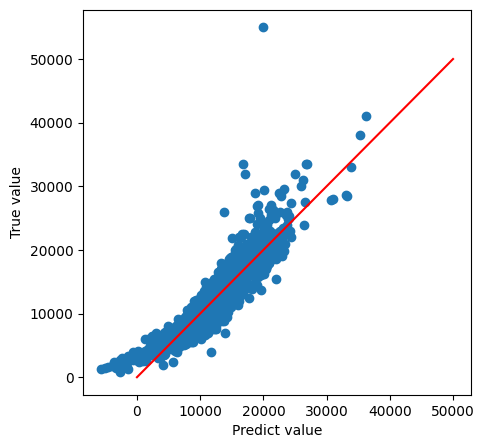

In [56]:
plt.figure(figsize=(5,5))
plt.scatter (yhat_test, y_test)
plt.xlabel('Predict value') 
plt.ylabel('True value')
plt.plot([0,50000], [0,50000],'k-', color = 'r')
plt.show()

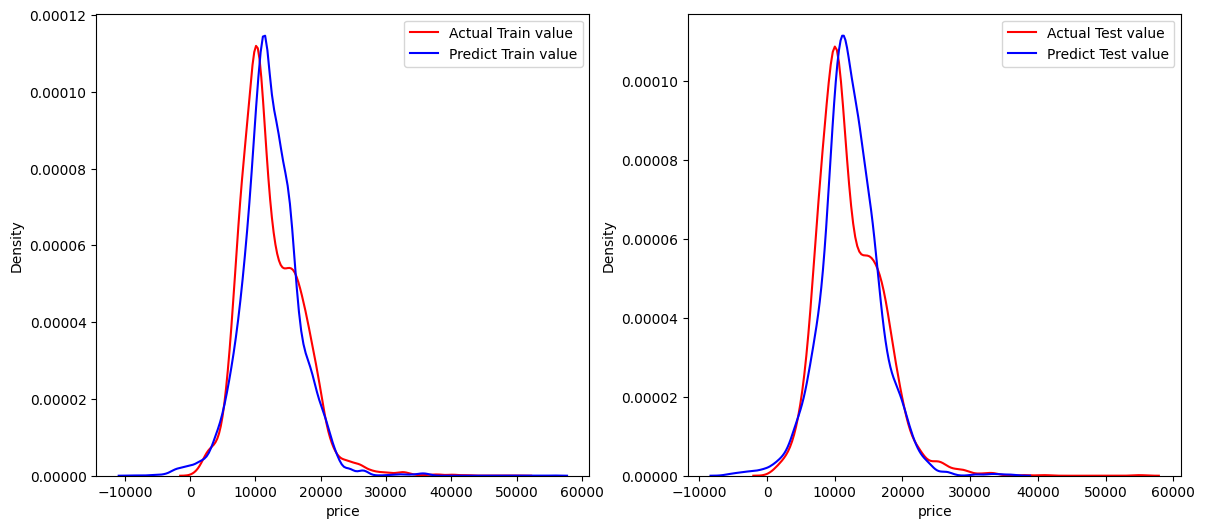

In [57]:
plt.figure(figsize=(14,6)) 
plt.subplot(1,2,1)
ax1 = sns.kdeplot(y_train, color='r', label='Actual Train value') 
sns.kdeplot (yhat_train, color='b', label='Predict Train value', ax=ax1) 
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.kdeplot (y_test, color='r', label='Actual Test value') 
sns.kdeplot (yhat_test, color='b', label='Predict Test value', ax=ax2) 
plt.legend()
plt.show()

### 2.3 Make prediction on Test data

In [58]:
df_test = pd.read_csv("./input_data/ford/test.csv")

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3596 entries, 0 to 3595
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3596 non-null   object 
 1   year          3596 non-null   int64  
 2   transmission  3596 non-null   object 
 3   mileage       3596 non-null   int64  
 4   fuelType      3596 non-null   object 
 5   tax           3596 non-null   int64  
 6   mpg           3596 non-null   float64
 7   engineSize    3596 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 224.9+ KB


In [60]:
df_test.describe()

year        mileage          tax          mpg   engineSize
count  3596.000000    3596.000000  3596.000000  3596.000000  3596.000000
mean   2016.855117   23479.818409   114.112903    57.815350     1.352864
std       2.025945   19652.574849    60.487749     9.922919     0.422036
min    2000.000000       1.000000     0.000000    22.100000     0.000000
25%    2016.000000    9949.500000   125.000000    52.300000     1.000000
50%    2017.000000   18338.000000   145.000000    58.900000     1.200000
75%    2018.000000   31152.000000   145.000000    65.700000     1.600000
max    2020.000000  177644.000000   555.000000   201.800000     5.000000

In [61]:
df_test.head()

model  year transmission  mileage fuelType  tax   mpg  engineSize
0    B-MAX  2015    Semi-Auto    47360   Petrol  160  44.1         1.6
1      Ka+  2019       Manual     1553   Petrol  145  47.9         1.2
2    Focus  2019       Manual     7445   Petrol  145  58.9         1.0
3   Fiesta  2020       Manual        9   Petrol  150  55.4         1.0
4   Fiesta  2017       Manual     8606   Petrol    0  65.7         1.0

In [62]:
df_test['transmission'] = df_test['transmission'].map(lambda x: 0 if x == 'Manual' else (1 if x == 'Semi-Auto' else 2))

In [63]:
df_test['model'] = df_test['model'].str.strip()

In [64]:
df_test['model'] = df_test['model'].map(lambda x : x if x in (df_test.model.value_counts()[:13].index.tolist()) else 2)

In [65]:
df_test['fuelType'] = df_test['fuelType'].map(lambda x : x if x in (df_test.fuelType.value_counts()[:2].index.tolist()) else 2)

In [66]:
df_test.describe (include='object')

model fuelType
count     3596     3596
unique      14        3
top     Fiesta   Petrol
freq      1324     2433

In [137]:
df_test_now= pd.get_dummies(df_test, columns= ['model', 'fuelType'], drop_first=False)
data = df_test_now.head()

In [138]:
X_test_now = df_test_now
X_test_now.head()

year  transmission  mileage  tax   mpg  engineSize  model_2  model_B-MAX  \
0  2015             1    47360  160  44.1         1.6        0            1   
1  2019             0     1553  145  47.9         1.2        0            0   
2  2019             0     7445  145  58.9         1.0        0            0   
3  2020             0        9  150  55.4         1.0        0            0   
4  2017             0     8606    0  65.7         1.0        0            0   

   model_C-MAX  model_EcoSport  ...  model_Galaxy  model_Grand C-MAX  \
0            0               0  ...             0                  0   
1            0               0  ...             0                  0   
2            0               0  ...             0                  0   
3            0               0  ...             0                  0   
4            0               0  ...             0                  0   

   model_KA  model_Ka+  model_Kuga  model_Mondeo  model_S-MAX  fuelType_2  \
0         0          0           0             0            0           0   
1         0          1           0             0            0           0   
2         0          0           0             0            0           0   
3         0          0           0             0            0           0   
4         0          0           0             0            0           0   

   fuelType_Diesel  fuelType_Petrol  
0                0                1  
1                0                1  
2                0                1  
3                0                1  
4                0                1  

[5 rows x 23 columns]

In [139]:
X_test_sc = scaler.transform(X_test_now)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test_now.columns) 
X_test_sc.head()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- fuelType_2
- fuelType_Diesel
- model_2
- model_B-MAX
Feature names seen at fit time, yet now missing:
- fuelType_other
- model_Other


In [70]:
Yhat_test_now = model.predict(X_test_sc)

NameError: name 'X_test_sc' is not defined

In [72]:
df_test_now.head()

year  transmission  mileage  tax   mpg  engineSize  model_B-MAX  \
0  2015             1    47360  160  44.1         1.6            1   
1  2019             0     1553  145  47.9         1.2            0   
2  2019             0     7445  145  58.9         1.0            0   
3  2020             0        9  150  55.4         1.0            0   
4  2017             0     8606    0  65.7         1.0            0   

   model_C-MAX  model_EcoSport  model_Edge  ...  model_Focus  model_Galaxy  \
0            0               0           0  ...            0             0   
1            0               0           0  ...            0             0   
2            0               0           0  ...            1             0   
3            0               0           0  ...            0             0   
4            0               0           0  ...            0             0   

   model_Grand C-MAX  model_KA  model_Ka+  model_Kuga  model_Mondeo  \
0                  0         0          0           0             0   
1                  0         0          1           0             0   
2                  0         0          0           0             0   
3                  0         0          0           0             0   
4                  0         0          0           0             0   

   model_S-MAX  fuelType_Diesel  fuelType_Petrol  
0            0                0                1  
1            0                0                1  
2            0                0                1  
3            0                0                1  
4            0                0                1  

[5 rows x 21 columns]

In [73]:
df_test_now.tail()

year  transmission  mileage  tax   mpg  engineSize  model_B-MAX  \
3591  2017             1    35680  145  52.3         2.0            0   
3592  2008             0   116000  145  47.1         1.2            0   
3593  2018             0     7223  145  60.1         1.0            0   
3594  2015             0    30324  235  43.5         2.2            0   
3595  2018             0     5343  145  60.1         1.0            0   

      model_C-MAX  model_EcoSport  model_Edge  ...  model_Focus  model_Galaxy  \
3591            0               0           0  ...            0             0   
3592            0               0           0  ...            0             0   
3593            0               0           0  ...            1             0   
3594            0               0           0  ...            0             0   
3595            0               0           0  ...            1             0   

      model_Grand C-MAX  model_KA  model_Ka+  model_Kuga  model_Mondeo  \
3591                  0         0          0           0             0   
3592                  0         0          0           0             0   
3593                  0         0          0           0             0   
3594                  0         0          0           0             0   
3595                  0         0          0           0             0   

      model_S-MAX  fuelType_Diesel  fuelType_Petrol  
3591            1                1                0  
3592            0                0                1  
3593            0                0                1  
3594            0                1                0  
3595            0                0                1  

[5 rows x 21 columns]

In [74]:
df_test['yhat_price'] = Yhat_test_now 
df_test.head()

NameError: name 'Yhat_test_now' is not defined

### 2.4 Pipeline

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import make_column_transformer

In [88]:
df.head()

model  year  price  transmission  mileage fuelType  tax   mpg  \
0    Fiesta  2017   8498             0    28637   Diesel    0  78.5   
1    Fiesta  2013   5490             0    45740   Petrol   30  54.3   
2    Fiesta  2018  13181             1    10414   Petrol  145  48.7   
3     B-MAX  2014   7998             0     9181   Petrol   30  55.4   
4  EcoSport  2016   7890             0    30035   Diesel   30  64.2   

   engineSize  
0         1.5  
1         1.2  
2         1.0  
3         1.0  
4         1.5

In [96]:
Input=[('column_tr', make_column_transformer ((OneHotEncoder(),
                                               ['model','fuelType']),
                                              remainder='passthrough')),
        ('scaler', RobustScaler()), 
        ('model', LinearRegression())]

In [97]:
pipe = Pipeline(Input)

In [98]:
X= df.drop('price', 1)
X.head()

model  year  transmission  mileage fuelType  tax   mpg  engineSize
0    Fiesta  2017             0    28637   Diesel    0  78.5         1.5
1    Fiesta  2013             0    45740   Petrol   30  54.3         1.2
2    Fiesta  2018             1    10414   Petrol  145  48.7         1.0
3     B-MAX  2014             0     9181   Petrol   30  55.4         1.0
4  EcoSport  2016             0    30035   Diesel   30  64.2         1.5

In [99]:
y= df['price']
y.head()

0     8498
1     5490
2    13181
3     7998
4     7890
Name: price, dtype: int64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [101]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('column_tr',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['model', 'fuelType'])])),
                ('scaler', RobustScaler()), ('model', LinearRegression())])

In [111]:
pipe.predict(X_test)

array([12096.75  ,  9653.0625,  8949.0625, ..., 10149.9375, 14156.1875,
       13569.6875])

In [112]:
pipe.score(X_train, y_train)

0.8397268008414378

In [113]:
pipe.score (X_test, y_test)

0.8289038101746986

In [114]:
df_test.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [127]:
data_pipe = df_test[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg','engineSize']]

In [128]:
y_new= pipe.predict(data_pipe)

ValueError: Found unknown categories [2] in column 0 during transform

In [ ]:
# Lưu cả kết quả với Pipeline vào file (với 1 cột mới)

In [131]:
df_test['price_pipe'] = y_new

NameError: name 'y_new' is not defined

In [129]:
df_test.head()

model  year  transmission  mileage fuelType  tax   mpg  engineSize
0   B-MAX  2015             1    47360   Petrol  160  44.1         1.6
1     Ka+  2019             0     1553   Petrol  145  47.9         1.2
2   Focus  2019             0     7445   Petrol  145  58.9         1.0
3  Fiesta  2020             0        9   Petrol  150  55.4         1.0
4  Fiesta  2017             0     8606   Petrol    0  65.7         1.0

In [130]:
df_test["yhat_price"]= df_test["yhat_price"].apply(lambda x: round(x))

KeyError: 'yhat_price'

In [132]:
df_test.head()

model  year  transmission  mileage fuelType  tax   mpg  engineSize
0   B-MAX  2015             1    47360   Petrol  160  44.1         1.6
1     Ka+  2019             0     1553   Petrol  145  47.9         1.2
2   Focus  2019             0     7445   Petrol  145  58.9         1.0
3  Fiesta  2020             0        9   Petrol  150  55.4         1.0
4  Fiesta  2017             0     8606   Petrol    0  65.7         1.0

In [133]:
df_test.to_csv('test_pred.csv', index = None)